In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import warnings
from statsmodels.graphics.tsaplots import plot_pacf

In [69]:
df = pd.read_csv('Instagram-Reach.csv')

In [71]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


# Checking Null Values

In [114]:
df.isnull().sum()

Date               0
Instagram reach    0
Day_of_week        0
dtype: int64

In [77]:
df['Instagram reach'].mean()

50474.71232876712

# Converting Date Type

In [117]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


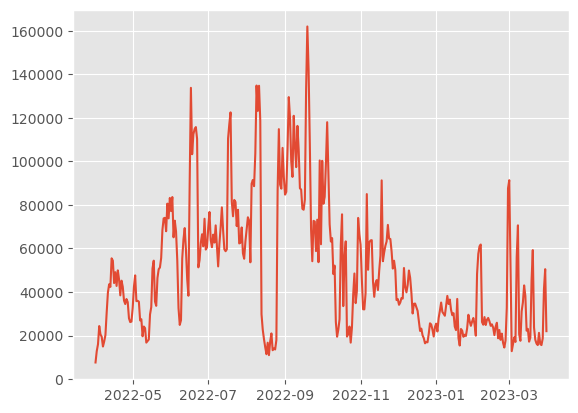

In [83]:
plt.plot(df['Date'],df['Instagram reach'])
plt.show()

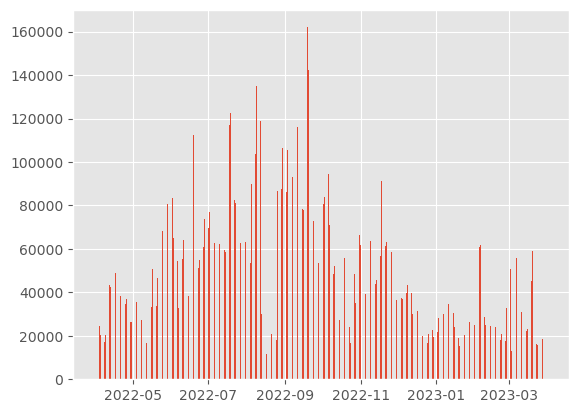

In [105]:
plt.bar(df['Date'],df['Instagram reach'], width=0.3 ,)
plt.show()

# Box plot

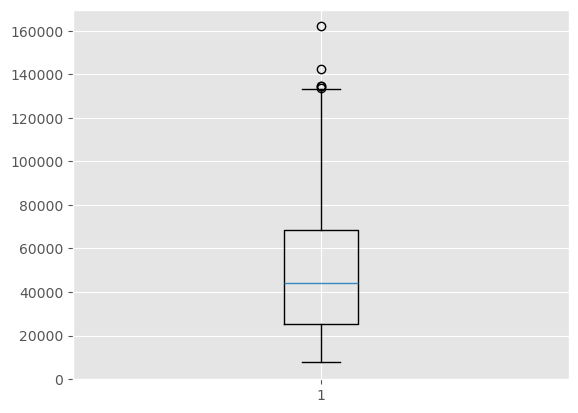

In [86]:
plt.boxplot(df['Instagram reach'])
plt.show()

In [88]:
df['Instagram reach'].median()

43987.0

# Creating a new Column "Day of Week"

In [91]:
df['Day_of_week'] = df['Date'].dt.day_name()  

In [93]:
df.head()

,Date,Instagram reach,Day_of_week
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


In [95]:
day_stats = df.groupby('Day_of_week')['Instagram reach'].agg(['mean','median','std'])
print(day_stats)

                     mean   median           std
Day_of_week                                     
Friday       46666.849057  35574.0  29856.943036
Monday       52621.692308  46853.0  32296.071347
Saturday     47374.750000  40012.0  27667.043634
Sunday       53114.173077  47797.0  30906.162384
Thursday     48570.923077  39150.0  28623.220625
Tuesday      54030.557692  48786.0  32503.726482
Wednesday    51017.269231  42320.5  29047.869685


# Bar Plot

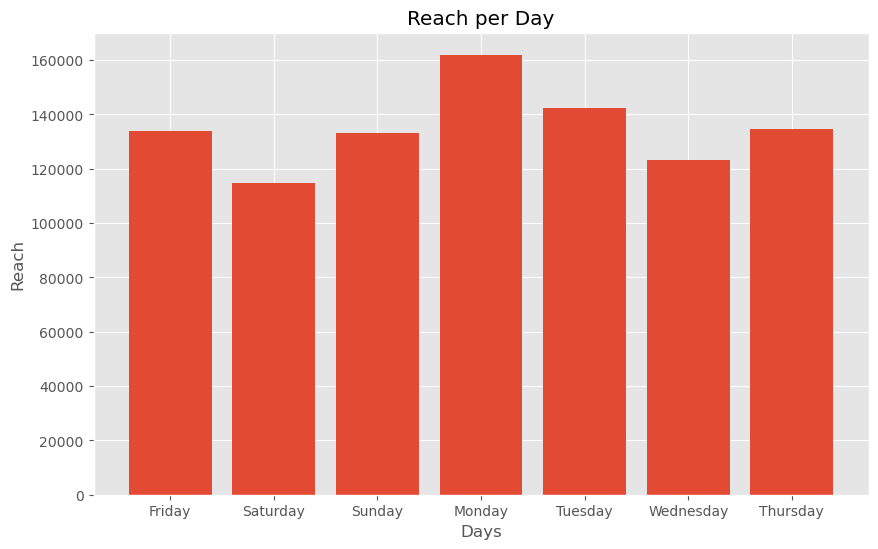

In [101]:
style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(df['Day_of_week'],df['Instagram reach'])
plt.xlabel('Days')
plt.ylabel('Reach')
plt.title('Reach per Day')
plt.show()

# Line Plot

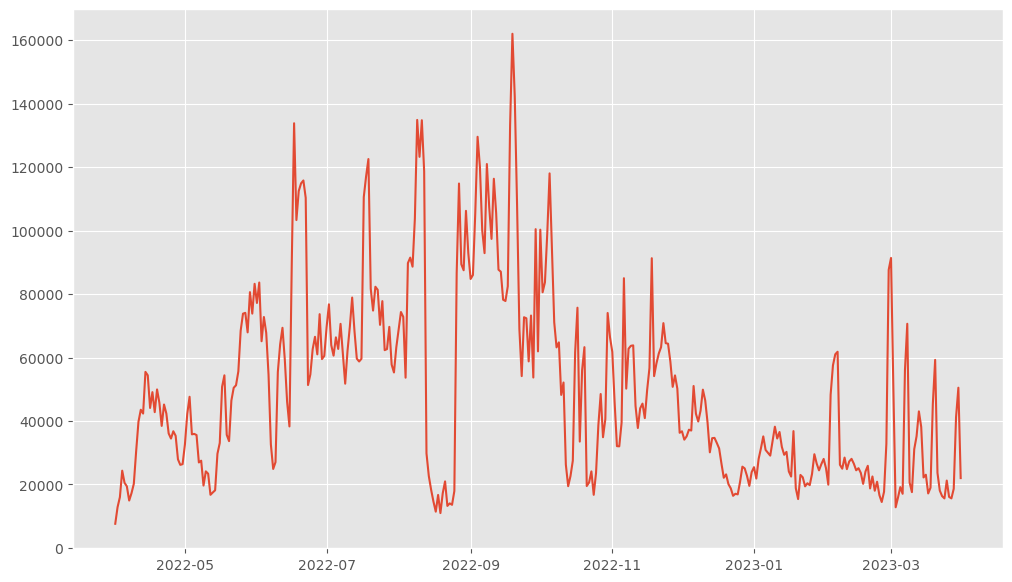

In [56]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'],df['Instagram reach']);

C:\Users\dambr\AppData\Local\Temp\ipykernel_15936\2550595180.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



<Figure size 640x480 with 0 Axes>

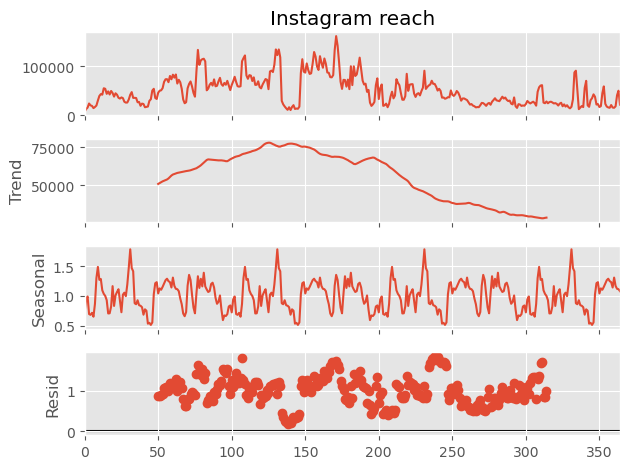

In [58]:
df = df[["Date", "Instagram reach"]]

result = seasonal_decompose(df['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure();
fig = result.plot();
fig.show();

# Value of "p"

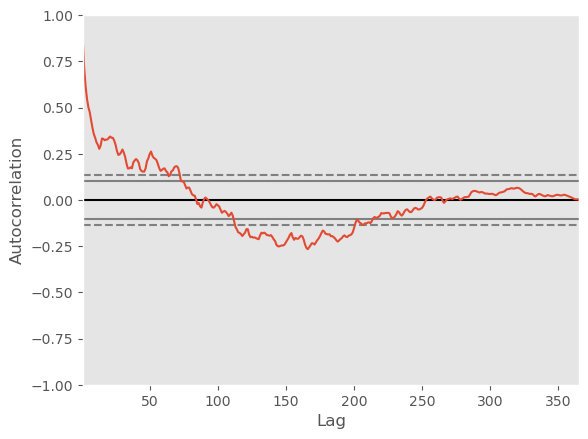

In [60]:
pd.plotting.autocorrelation_plot(df["Instagram reach"]);

# Value of "q"

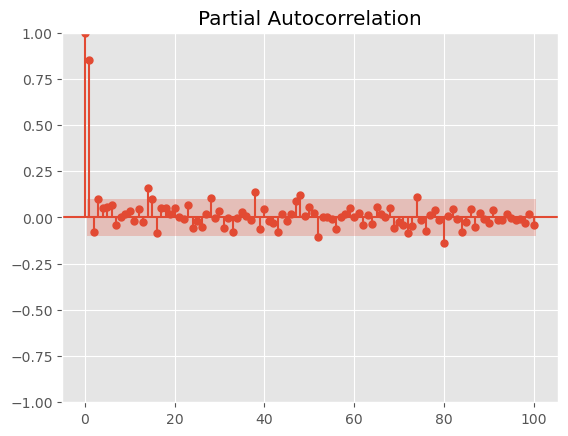

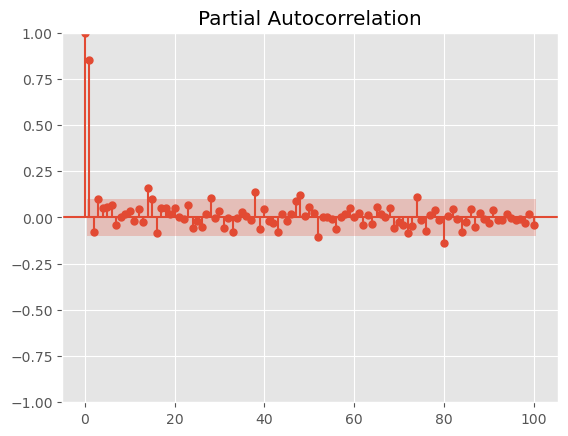

In [62]:
plot_pacf(df["Instagram reach"], lags = 100)

# Fitting Model

In [64]:
p, d, q = 8, 1, 2
model=sm.tsa.statespace.SARIMAX(df['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\dambr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.513
Date:                            Sun, 07 Jul 2024   AIC                           7919.026
Time:                                    14:32:32   BIC                           8000.162
Sample:                                         0   HQIC                          7951.314
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1899      6.317      0.030      0.976     -12.192      12.572
ar.L2          0.4742      5.878   

# Prediction

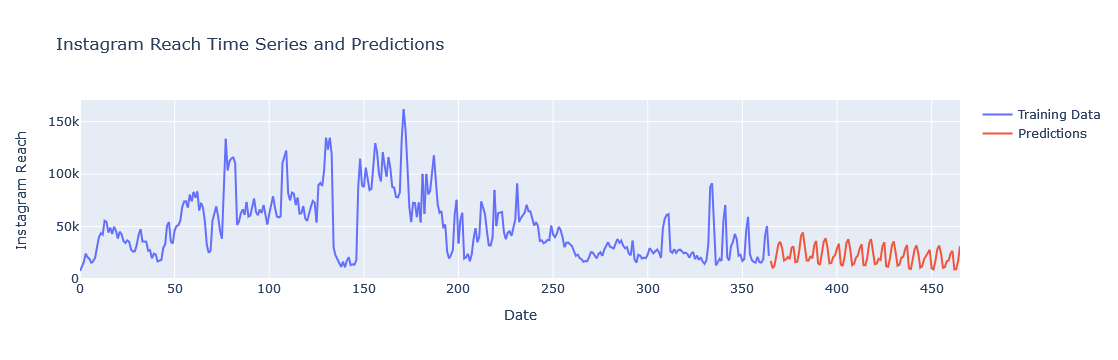

In [107]:
predictions = model.predict(len(df), len(df)+100)

trace_train = go.Scatter(x=df.index, 
                         y=df["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index, 
                        y=predictions, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()